## Alexander's Test Script

In [1]:
import numpy as np

from model import *
import csv

# My Imports
import pandas as pd
from scipy.stats import pareto
import scipy

In [2]:
r_incomes = []
incomes = []
counts = []

with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        r_incomes.append(row)
        incomes.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12])
        counts.append(int(row[2]))

cum_counts = []
for i in range(len(counts)):
    cum_counts.append(sum(counts[:i + 1]))

hhld_count = sum(counts)

cum_ratios = [x / hhld_count for x in cum_counts]


# Plotting CSV Data

<AxesSubplot:title={'center':'Income Distribution'}>

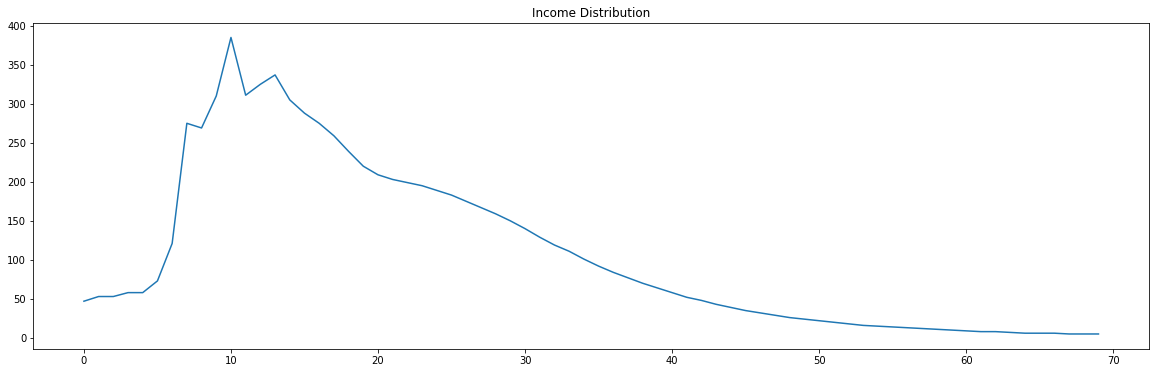

In [3]:
ri = pd.DataFrame(r_incomes, columns=['LI', 'HI', 'N']).astype(int)
ri.N.plot(figsize=(20,6), title='Income Distribution')

,Income_M
count,7679.000000
mean,3484.969831
std,2028.657188
min,83.333333
25%,1916.666667
50%,3083.333333
75%,4583.333333
max,11583.333333


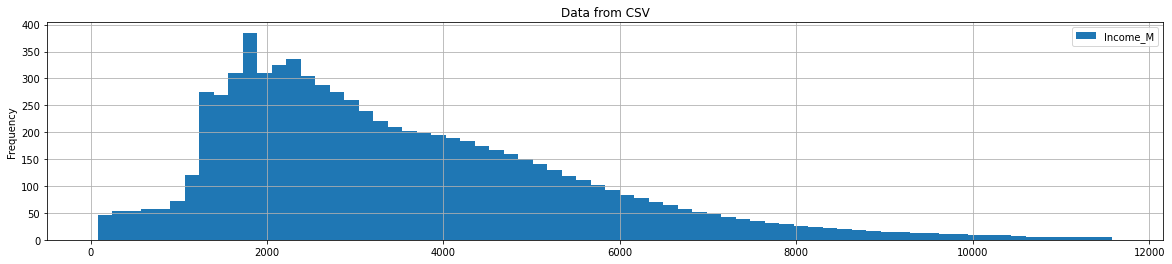

In [4]:
""" Convert to individual Data """
r_incomes = np.array(r_incomes, dtype=int)
data = []
for row in r_incomes:
    for _ in range(row[2]):
        data.append( np.mean([row[1], row[0]]) * 1000 /12 )


""" Analysing Income Data """
data_df = pd.DataFrame(data, columns=['Income_M'])
data_df.plot.hist(bins=70, figsize=(20,4), title="Data from CSV", grid=True)
data_df.describe()

# Chi-Squared Distribution Approach

,Constructed,CSV
count,10000.000000,7679.000000
mean,3487.056151,3484.969831
std,1950.158963,2028.657188
min,103.629205,83.333333
25%,2056.764561,1916.666667
50%,3138.572370,3083.333333
75%,4520.778864,4583.333333
max,14715.848777,11583.333333


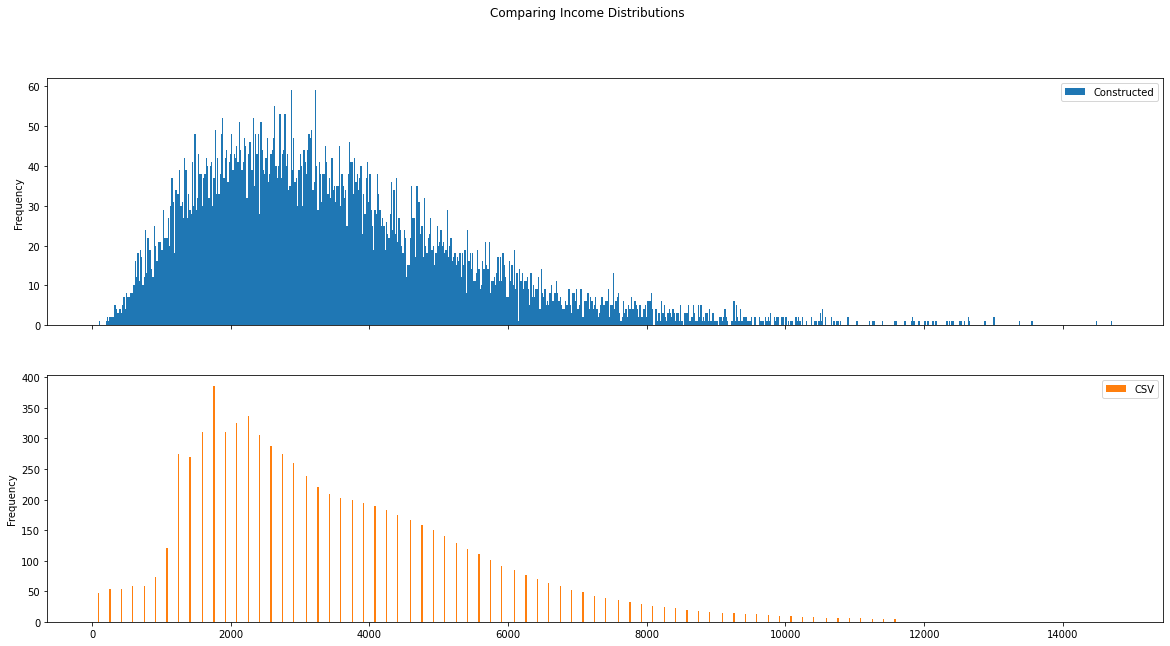

In [5]:
combined_df = pd.DataFrame()

parameter   = 6.5
size        = 10_000
cd = scipy.random.chisquare(parameter, size=size)

""" Scale for Std """
cd = cd / (2*parameter)**1/2

""" Adjust Mean so ~= 2600 """
mean_chi = parameter / (2*parameter)**1/2
cd = cd * (3484 / mean_chi)
combined_df['Constructed'] = np.sort(cd)
combined_df['CSV'] = data_df.Income_M

""" Plot Both Distributions """
combined_df.plot.hist(bins=800, figsize=(20,10), title="Comparing Income Distributions", subplots=True)

""" Describe Combined """
combined_df.describe()

** Not important
## Pareto Distribution of the Income Inequality

Pareto's distribution is used when modeling the income for different percentiles of a population. As percentiles increase, the Income grows exponentially following approximately the Pareto's distribution.
#### Pareto PDF:

$ f(x, b) = \frac{b}{x^{b+1}}$ , $x \geq 1,  b > 1 $

In this case x = 1, by fitting to the data and getting alpha, we can describe the degree of the income inequality

,CSV,Constructed
Percentile,,
0,83.333333,103.629205
1,250.000000,601.526522
2,583.333333,725.963134
3,750.000000,833.294825
4,916.666667,937.438007
...,...,...
96,7750.000000,7575.653664
97,8250.000000,8034.670825
98,8916.666667,8631.245964


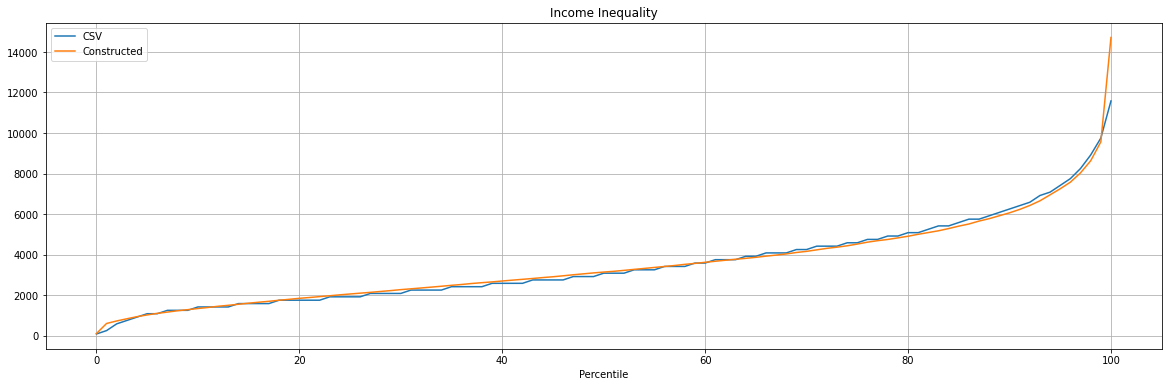

In [6]:
data_p = []
cd_p  = []
df_index = []
for percentile in range (101):
    df_index.append(percentile)
    data_p.append(combined_df.CSV.quantile(percentile/100))
    cd_p.append(combined_df.Constructed.quantile(percentile/100))

percentile_df = pd.DataFrame()
percentile_df['Percentile'] = df_index
percentile_df['CSV'] = data_p
percentile_df['Constructed'] = cd_p
percentile_df.set_index('Percentile', inplace=True)
percentile_df.plot(figsize=(20,6), title="Income Inequality", grid=True)
percentile_df

# Model Age Income Distribution
Income Data from the source is used a reference to calculate the income age distribution, relative to the mean income

TODO: Add Dutch Equivalent
data source : https://dqydj.com/average-median-top-income-by-age-percentiles/

In [7]:
Age_Average_Income = {
16	:5821.30,
17	:6760.37,
18	:9725.23,
19	:15062.78,
20	:18513.14,
21	:20712.18,
22	:24447.43,
23	:29814.28,
24	:33164.56,
25	:41461.27,
26	:43945.65,
27	:48376.91,
28	:47399.65,
29	:51638.49,
30	:52706.53,
31	:59068.01,
32	:58708.88,
33	:59082.00,
34	:60506.92,
35	:66320.38,
36	:68082.22,
37	:69128.48,
38	:66746.23,
39	:70235.80,
40	:72731.18,
41	:77143.30,
42	:71286.43,
43	:83279.50,
44	:74478.19,
45	:79101.10,
46	:75233.96,
47	:78354.08,
48	:68728.45,
49	:75458.16,
50	:81711.22,
51	:75777.31,
52	:80279.55,
53	:80802.58,
54	:77406.45,
55	:77308.78,
56	:76857.49,
57	:78139.14,
58	:73165.04,
59	:78624.85,
60	:73392.66,
61	:77592.46,
62	:77624.55,
63	:77189.64,
64	:73604.15,
65	:74420.36,
66	:79289.75,
67	:93445.14,
68	:84150.09,
69	:82464.49,
70	:76164.60,
71	:76744.71,
72	:98444.27,
73	:92254.10,
74	:70337.44,
75	:70820.15
}

,Original,Coefficient,Dutch
Age,,,
16,485.108333,0.090929,317.073106
17,563.364167,0.105597,368.222135
18,810.435833,0.151908,529.711385
19,1255.231667,0.235280,820.435717
20,1542.761667,0.289175,1008.369059
21,1726.015000,0.323524,1128.145817
22,2037.285833,0.381868,1331.596476
23,2484.523333,0.465698,1623.916713
24,2763.713333,0.518030,1806.398923


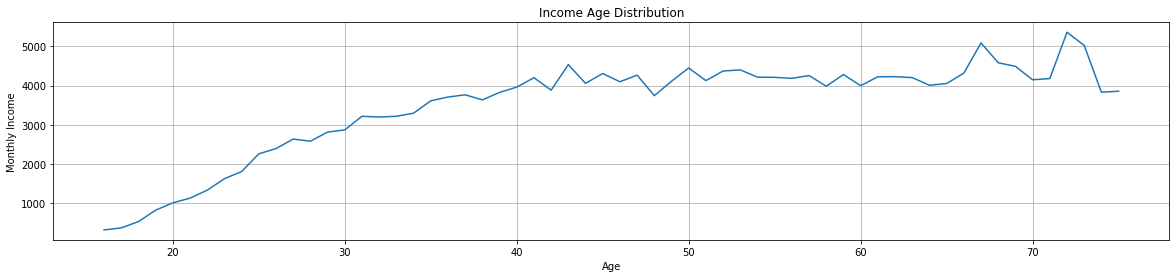

In [8]:
aid = pd.DataFrame.from_dict(Age_Average_Income, orient='index', columns=['Original'])
aid.index.rename('Age', inplace=True)

""" Adjust for Monthly Income """
aid.Original = aid.Original / 12

""" Adjust Relative to the Mean """
aid['Coefficient'] = aid.Original / aid.Original.mean()
aid['Dutch'] = aid.Coefficient * combined_df.Constructed.mean()
aid.Dutch.plot(figsize=(20,4), title="Income Age Distribution", ylabel='Monthly Income', grid=True)

""" Numpy array of Age Coefficient """
age_coef = aid.Coefficient.to_numpy()
aid

# Generate 3D data
incomes format      = (lower_bound, upper_bound)
cum_ratios format   = (age, cum_ratios)

In [9]:
data = []
with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        data.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12, int(row[2])])
data = np.array(data).astype(float)
data[:,2] = np.cumsum(data[:,2]/data[:,2].sum())
bins = (data[:, 1]).flatten()
bins = np.insert(bins, 0, 0)
bins

array([    0.        ,   166.66666667,   333.33333333,   500.        ,
         666.66666667,   833.33333333,  1000.        ,  1166.66666667,
        1333.33333333,  1500.        ,  1666.66666667,  1833.33333333,
        2000.        ,  2166.66666667,  2333.33333333,  2500.        ,
        2666.66666667,  2833.33333333,  3000.        ,  3166.66666667,
        3333.33333333,  3500.        ,  3666.66666667,  3833.33333333,
        4000.        ,  4166.66666667,  4333.33333333,  4500.        ,
        4666.66666667,  4833.33333333,  5000.        ,  5166.66666667,
        5333.33333333,  5500.        ,  5666.66666667,  5833.33333333,
        6000.        ,  6166.66666667,  6333.33333333,  6500.        ,
        6666.66666667,  6833.33333333,  7000.        ,  7166.66666667,
        7333.33333333,  7500.        ,  7666.66666667,  7833.33333333,
        8000.        ,  8166.66666667,  8333.33333333,  8500.        ,
        8666.66666667,  8833.33333333,  9000.        ,  9166.66666667,
      

In [10]:
data_3d = []
for c in age_coef:
    data_3d.append(c * np.sort(cd))
data_3d = np.array(data_3d).T
pd.DataFrame(data_3d)
data_3d

array([[9.42285766e+00, 1.09429173e+01, 1.57420951e+01, ...,
        1.49330434e+02, 1.13854240e+02, 1.14635596e+02],
       [1.77823555e+01, 2.06509375e+01, 2.97077108e+01, ...,
        2.81809080e+02, 2.14860145e+02, 2.16334682e+02],
       [2.06368460e+01, 2.39659036e+01, 3.44765042e+01, ...,
        3.27046133e+02, 2.49350303e+02, 2.51061538e+02],
       ...,
       [1.23219814e+03, 1.43097166e+03, 2.05854540e+03, ...,
        1.95274819e+04, 1.48883691e+04, 1.49905446e+04],
       [1.31798337e+03, 1.53059544e+03, 2.20186065e+03, ...,
        2.08869788e+04, 1.59248924e+04, 1.60341814e+04],
       [1.33809141e+03, 1.55394723e+03, 2.23545372e+03, ...,
        2.12056446e+04, 1.61678533e+04, 1.62788096e+04]])

In [11]:
density, bounds = np.histogram(data_3d, bins=bins, density=False)
bounds = bounds.astype(int)
ul_income_bounds = []
for i, b in enumerate(bounds):
    if i == 0 : pass
    elif i == 1 : ul_income_bounds.append([0, b])
    else: ul_income_bounds.append([bounds[i-1], b])
ul_income_bounds

[[0, 166],
 [166, 333],
 [333, 500],
 [500, 666],
 [666, 833],
 [833, 1000],
 [1000, 1166],
 [1166, 1333],
 [1333, 1500],
 [1500, 1666],
 [1666, 1833],
 [1833, 2000],
 [2000, 2166],
 [2166, 2333],
 [2333, 2500],
 [2500, 2666],
 [2666, 2833],
 [2833, 3000],
 [3000, 3166],
 [3166, 3333],
 [3333, 3500],
 [3500, 3666],
 [3666, 3833],
 [3833, 4000],
 [4000, 4166],
 [4166, 4333],
 [4333, 4500],
 [4500, 4666],
 [4666, 4833],
 [4833, 5000],
 [5000, 5166],
 [5166, 5333],
 [5333, 5500],
 [5500, 5666],
 [5666, 5833],
 [5833, 6000],
 [6000, 6166],
 [6166, 6333],
 [6333, 6500],
 [6500, 6666],
 [6666, 6833],
 [6833, 7000],
 [7000, 7166],
 [7166, 7333],
 [7333, 7500],
 [7500, 7666],
 [7666, 7833],
 [7833, 8000],
 [8000, 8166],
 [8166, 8333],
 [8333, 8500],
 [8500, 8666],
 [8666, 8833],
 [8833, 9000],
 [9000, 9166],
 [9166, 9333],
 [9333, 9500],
 [9500, 9666],
 [9666, 9833],
 [9833, 10000],
 [10000, 10166],
 [10166, 10333],
 [10333, 10500],
 [10500, 10666],
 [10666, 10833],
 [10833, 11000],
 [11000, 1

In [12]:
new_cum_ratios = []
dd = []  # Number of people that make that much money
for age in range(data_3d.shape[1]):
    density, bounds = np.histogram(data_3d[:, age], bins=bins, density=False)
    new_cum_ratios.append(np.cumsum(density) / np.cumsum(density)[-1])
    dd.append(density)

density
# pd.DataFrame(np.array(new_cum_ratios).T)

array([  1,   9,  32,  59, 115, 149, 175, 219, 275, 280, 305, 306, 347,
       355, 348, 367, 330, 365, 345, 338, 345, 324, 316, 292, 297, 292,
       258, 240, 219, 194, 177, 219, 168, 179, 151, 133, 124, 118, 101,
       107,  94,  86,  73,  61,  60,  44,  55,  47,  39,  53,  35,  38,
        30,  37,  25,  21,  21,  19,  23,  14,  14,  17,  14,  10,  10,
         8,   9,   7,   4,  11], dtype=int64)

In [13]:
data_3d

array([[9.42285766e+00, 1.09429173e+01, 1.57420951e+01, ...,
        1.49330434e+02, 1.13854240e+02, 1.14635596e+02],
       [1.77823555e+01, 2.06509375e+01, 2.97077108e+01, ...,
        2.81809080e+02, 2.14860145e+02, 2.16334682e+02],
       [2.06368460e+01, 2.39659036e+01, 3.44765042e+01, ...,
        3.27046133e+02, 2.49350303e+02, 2.51061538e+02],
       ...,
       [1.23219814e+03, 1.43097166e+03, 2.05854540e+03, ...,
        1.95274819e+04, 1.48883691e+04, 1.49905446e+04],
       [1.31798337e+03, 1.53059544e+03, 2.20186065e+03, ...,
        2.08869788e+04, 1.59248924e+04, 1.60341814e+04],
       [1.33809141e+03, 1.55394723e+03, 2.23545372e+03, ...,
        2.12056446e+04, 1.61678533e+04, 1.62788096e+04]])

In [279]:
df3d = pd.DataFrame(np.array(new_cum_ratios).T, columns=aid.index.values).set_index(bins[1:].astype(int))
df3d_ri = pd.DataFrame(np.array(dd).T, columns=aid.index.values).set_index(bins[1:].astype(int))
for age in range(76, 101):
    df3d[age] = df3d[75]
df3d.drop(columns=[16,17], inplace=True)

<AxesSubplot:title={'center':'Cumulative Income Distribution per Age'}>

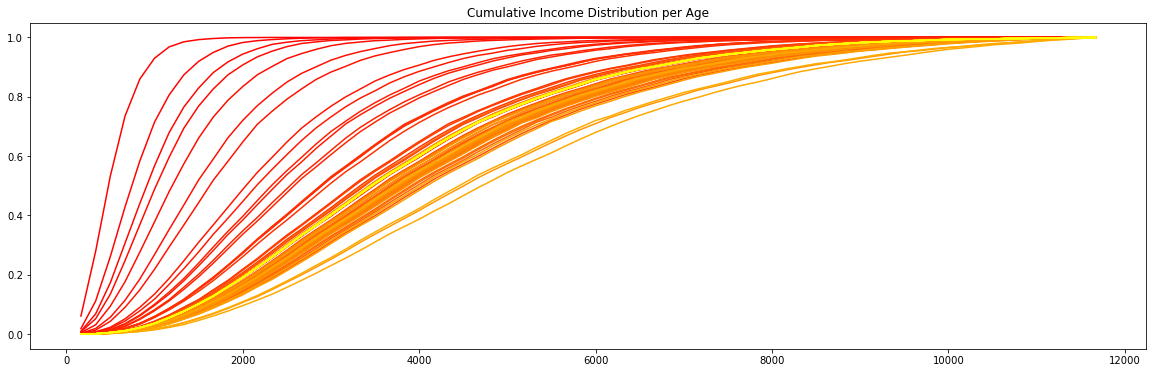

In [280]:
df3d.plot(figsize=(20,6), legend=False, colormap='autumn', title='Cumulative Income Distribution per Age')

<AxesSubplot:title={'center':'Income Distribution per Age'}>

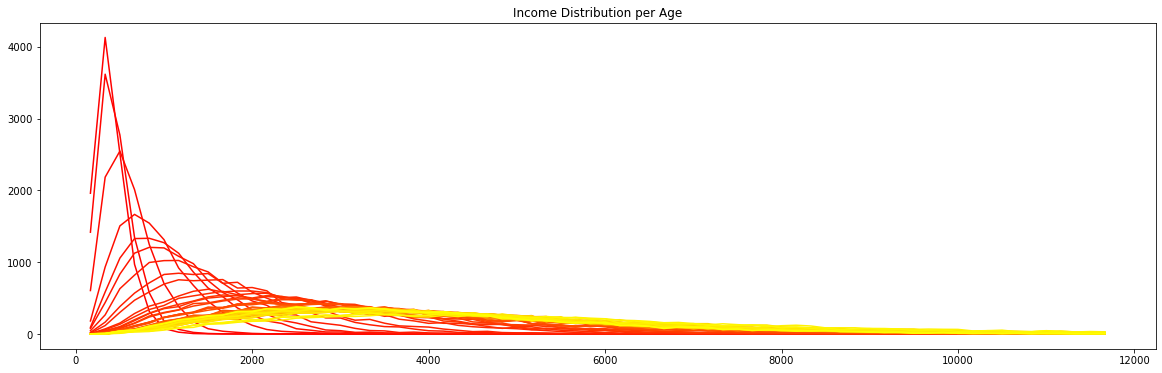

In [281]:
df3d_ri.plot(figsize=(20,6), legend=False, colormap='autumn', title='Income Distribution per Age')

# To Use in the model

In [282]:
"""
incomes     : remains as it is
cum_rations : with one additional dimension (age), shape = (69, 60) (69 bins, 60 ages [16, 75)
"""
incomes = np.array(incomes)
new_cum_ratios = df3d.to_numpy()

In [283]:
np.save('new_incomes', incomes)
np.save('new_cum_ratios', new_cum_ratios)

"""
Use:
new_incomes    = np.load('new_incomes)
new_cum_ratios = np.load('new_cum_ratios')
"""

"\nUse:\nnew_incomes    = np.load('new_incomes)\nnew_cum_ratios = np.load('new_cum_ratios')\n"

------------------------------------------------------------------------------------------------------------------------------
# Calculate Income

In [172]:
income_df = pd.read_csv("Income Data/Dutch_data.csv")

income_df['Monthly_Average_Income'] = (income_df['Income_Low'] + income_df['Income_High'])/2
income_df.drop(columns=["Income_High", "Income_Low"], inplace=True)
income_df['Bins'] = income_df.index
income_df = income_df[["Bins", "Monthly_Average_Income", '<25', '25-35', '35-45', '45-55', '55-65', '65-75', '>75']]
income_df.to_csv("Income Data/Processed_Income.csv")
incomes = income_df.to_numpy()
income_df

,Bins,Monthly_Average_Income,<25,25-35,35-45,45-55,55-65,65-75,>75
0,0,-5.0,0,0,0,0,0,0,0
1,1,-3.0,1,0,0,0,1,0,0
2,2,-1.0,22,5,1,1,1,1,1
3,3,1.0,30,6,2,2,2,1,3
4,4,3.0,30,9,3,4,4,1,3
...,...,...,...,...,...,...,...,...,...
68,68,131.0,0,0,1,2,2,0,0
69,69,133.0,0,0,1,2,2,0,0
70,70,135.0,0,0,1,2,2,0,0
71,71,137.0,0,0,1,2,1,0,0


In [173]:
income_df[["Monthly_Average_Income"]] = income_df[["Monthly_Average_Income"]] * 1000 / 12
for column in income_df[['<25', '25-35', '35-45', '45-55', '55-65', '65-75', '>75']].columns:
    income_df[[column]] = income_df[[column]] / income_df[[column]].sum()
    income_df[[column]] = income_df[[column]].cumsum()
income_df.to_csv("Income Data/Processed_data.csv")
incomes = income_df.to_numpy()
np.save("Income Data/income_distribution", income_df.to_numpy())
income_df
incomes

array([[ 0.00000000e+00, -4.16666667e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -2.50000000e+02,  2.83286119e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.19424460e-04,  0.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00, -8.33333333e+01,  6.51558074e-02,
         4.25531915e-03,  8.46023689e-04,  6.76589986e-04,
         1.43884892e-03,  8.54700855e-04,  1.04166667e-03],
       [ 3.00000000e+00,  8.33333333e+01,  1.50141643e-01,
         9.36170213e-03,  2.53807107e-03,  2.02976996e-03,
         2.87769784e-03,  1.70940171e-03,  4.16666667e-03],
       [ 4.00000000e+00,  2.50000000e+02,  2.35127479e-01,
         1.70212766e-02,  5.07614213e-03,  4.73612991e-03,
         5.75539568e-03,  2.56410256e-03,  7.29166667e-03],
       [ 5.00000000e+00,  4.16666667e+02,  3.11614731e-01,
         2.46808511e-02,  8.46023689e-03,  7.442489

In [177]:
# load np file with income_dist
def initialize_income_bin_percentile(age):
    # Get column relative to the age
    column = 8
    for inx, column_age in enumerate([25, 35, 45, 55, 65, 75]):
        if age < column_age:
            column = inx + 2 ; break

    rn = np.random.uniform(0, 1, 1)[0]
    for row in incomes:
        if rn < row[column]:
            return row[1], int(row[0]), row[column]

initialize_income_bin_percentile(36)

(4916.666666666667, 32, 0.7098138747884942)

In [204]:
age = 36
percentile = 0.7098138747884942

def update_income_bin_percentile(age, percentile):
    # Get column relative to the age
    column = 8
    for inx, column_age in enumerate([25, 35, 45, 55, 65, 75]):
        if age < column_age:
            column = inx + 2 ; break

    random_walk_bin = np.random.normal(loc=0, scale=1, size=1).astype(int)[0]   ;   bin = None
    print(random_walk_bin)
    print(percentile)
    for row in incomes:
        if percentile < row[column]:
            print(row[column])
            bin = int(row[0] + random_walk_bin)
            break
    return incomes[bin, 1], bin, incomes[bin, column]

update_income_bin_percentile(age, percentile)

-1
0.7098138747884942
0.7360406091370559


(4916.666666666667, 32, 0.7098138747884942)